# Machine Learning Applications (Unsupervised Learning)

### Imports

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, confusion_matrix
from scipy.spatial.distance import cdist
import datetime
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
sns.set()
pd.options.display.max_columns = 100

## Custom functions

In [2]:
# take df, make copy, show info() and return the dataframe
def copy_get_info_df(df):
    new_df = df.copy()
    new_df.info()
    print('total missing values : ', new_df.insull().sum())
    print('the shape is : ', new_df.shape)
    return new_df
#-------------------------------------------------------------------
# pass list of dataframes and get all the infos, shape, missing values at once 
def get_all_df_info(dataframes):
    df_names = ['customer data :','order items : ','order payments : ','order reviews :','orders datasets : ','products datasets : ','sellers : ','product translation :']
    for name,df in zip(df_names,dataframes):
        print('INFORMATION ABOUT', name,'\n')
        new_df = df.copy()
        df.info()
        print('\n Total missing values:\n', new_df.isnull().sum(),'\n')
        print('Shape : ', new_df.shape)
        print('\n')
        print('-----------------------------------------------------')
#---------------------------------------------------------------------
        
        

## Loading the Data

In [3]:
# loading the data we saved from the analysis
master_df1 = pd.read_csv('data_cleaned.csv')

In [4]:
master_df1.head()
master_df1.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,product_category_name_english,year,month,credit_card,debit_card,voucher,time_elapsed_delivery,Recency,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23.576983,-46.587161,housewares,2017,10,1,0,0,8.0,335,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23.576983,-46.587161,housewares,2017,10,0,0,1,8.0,335,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23.576983,-46.587161,housewares,2017,10,0,0,1,8.0,335,4
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,493e9a0b23de35d37871a6e8940f822a,5,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,bebes,35.0,2395.0,1.0,350.0,19.0,14.0,12.0,7025,guarulhos,SP,-23.576983,-46.587161,baby,2017,9,1,0,0,1.0,335,4
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04 00:00:00,8a4002923e801e3120a11070fd31c9e2,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,1,credit_card,2,223.38,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,13405,piracicaba,SP,-23.576983,-46.587161,bed_bath_table,2018,3,1,0,0,2.0,164,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116280 entries, 0 to 116279
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116280 non-null  object 
 1   customer_id                    116280 non-null  object 
 2   order_status                   116280 non-null  object 
 3   order_purchase_timestamp       116280 non-null  object 
 4   order_approved_at              116280 non-null  object 
 5   order_delivered_carrier_date   115072 non-null  object 
 6   order_delivered_customer_date  116279 non-null  object 
 7   order_estimated_delivery_date  116280 non-null  object 
 8   customer_unique_id             116280 non-null  object 
 9   customer_city                  116280 non-null  object 
 10  customer_state                 116280 non-null  object 
 11  review_id                      116280 non-null  object 
 12  review_score                  

## Selecting the features

In [5]:
#selecting numeric columns
#creating dataframe that has only numeric columns then extract them easy
numeric_df = master_df1.select_dtypes(exclude=[object,'datetime'])
numeric_columns = list(numeric_df.columns.values)


In [6]:
# columns to remove
columns_to_remove = ['product_height_cm', 'product_width_cm', 'product_length_cm', 'order_item_id', 'price', 'month','order_item_id']

# clean numeric list
numeric_list_clean = [element for element in numeric_columns if element not in columns_to_remove]

# append the customer unique id 
numeric_list_clean.append('customer_unique_id')

In [7]:
# Very high level of groupby use ! 
# we are grouping by customer ids and aggregating every column on what it should be 
clustering_customers_df = master_df1[numeric_list_clean]
clustering_customers_df = clustering_customers_df.groupby('customer_unique_id').agg({ 'review_score': 'mean', 'payment_value':'sum'
           ,'time_elapsed_delivery':'mean','product_weight_g':'mean','geolocation_lng':'mean','geolocation_lat':'mean','product_description_lenght':'mean'}).reset_index()

clustering_customers_df.head()

# there is 1 missing value for 1 column, just fill it does matter
clustering_customers_df =clustering_customers_df.fillna(method='ffill')

,customer_unique_id,review_score,payment_value,time_elapsed_delivery,product_weight_g,geolocation_lng,geolocation_lat,product_description_lenght
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,141.90,6.0,1500.0,-46.830140,-23.340235,236.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,27.19,3.0,375.0,-46.787626,-23.559115,635.0
2,0000f46a3911fa3c0805444483337064,3.0,86.22,25.0,1500.0,-48.633426,-27.542880,177.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,43.62,20.0,150.0,-48.483159,-1.312214,1741.0
4,0004aac84e0df4da2b147fca70cf8255,5.0,196.89,13.0,6050.0,-47.469705,-23.505548,794.0


<Figure size 720x720 with 0 Axes>

Text(0.5, 1, 'Corrélations entres les features')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

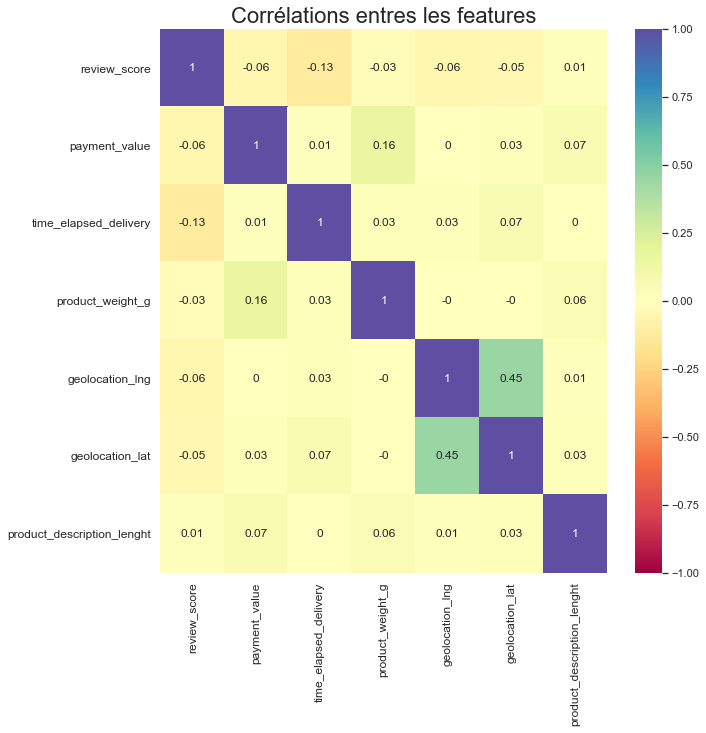

In [8]:
#Plot heatmap to see correlations to help us decide to remove some or add
plt.figure(figsize=(10,10))
sns.heatmap(clustering_customers_df.corr().round(2), xticklabels=clustering_customers_df.corr().columns, yticklabels=clustering_customers_df.corr().columns, cmap='Spectral',vmin=-1, vmax=1, annot=True)

plt.title('Corrélations entres les features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Scale data using Z-score

In [9]:
#scale data with Z score !
from sklearn.preprocessing import StandardScaler

# selecting columns
numeric_df1 = clustering_customers_df.select_dtypes(exclude=[object])
num_columns = list(numeric_df1.columns.values)
num_columns

#instantiate scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df1)
data_scaled.shape

['review_score',
 'payment_value',
 'time_elapsed_delivery',
 'product_weight_g',
 'geolocation_lng',
 'geolocation_lat',
 'product_description_lenght']

(93836, 7)

In [10]:
# slicing data for T-SNE
sliced_data = numeric_df1.sample(10000,random_state=9)
sclaed_sliced_data = scaler.transform(sliced_data)
sliced_data_df = pd.DataFrame(data = sclaed_sliced_data, columns=sliced_data.columns)
sliced_data_df.head()

,review_score,payment_value,time_elapsed_delivery,product_weight_g,geolocation_lng,geolocation_lat,product_description_lenght
0,-0.440417,-0.074499,-0.086217,0.621262,0.314334,0.265205,0.046275
1,0.681482,-0.024111,-0.086217,-0.420599,-1.005075,0.158552,4.514245
2,-0.066450,-0.197935,-0.001465,0.103067,-0.066521,-0.504652,0.616295
3,-0.066450,-0.217417,-0.114468,-0.404051,0.735502,-0.311680,-0.777257
4,0.681482,-0.230184,-0.170970,-0.537503,0.685853,-0.318818,-0.589811


# K-means clustering 
## Evaluation metrics : 

## coefficient silhouette (find optimal K clusters, computational heavy) 

In [11]:
from sklearn.metrics import silhouette_score

# calculate coefficient shilouaite to find optimal cluster
silh = []
for i in range(2,10):
    kmeans = KMeans(i,n_jobs=-1, verbose=3,random_state=9)
    kmeans.fit(sliced_data_df)
    silhouhaite = silhouette_score(sliced_data_df, kmeans.labels_)
    silh.append(silhouhaite)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=3)

<Figure size 1008x576 with 0 Axes>

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'silh coef [0-1]')

Text(0.5, 1.0, 'The coefficient silhouette method')

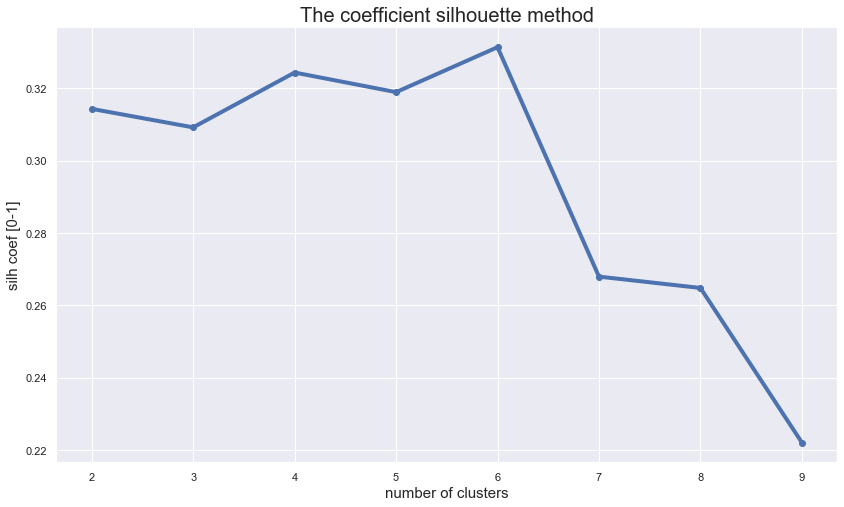

In [12]:
# plot coef shilouaite
plt.figure(figsize=(14,8))
plt.plot(range(2,10), silh, linewidth=4, marker='o')
plt.xlabel('number of clusters',fontsize=15)
plt.ylabel('silh coef [0-1]',fontsize=15)
plt.title('The coefficient silhouette method',fontsize=20)
plt.show()

## Culsters stability with Elbow method (help also find optimal K ) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 1008x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

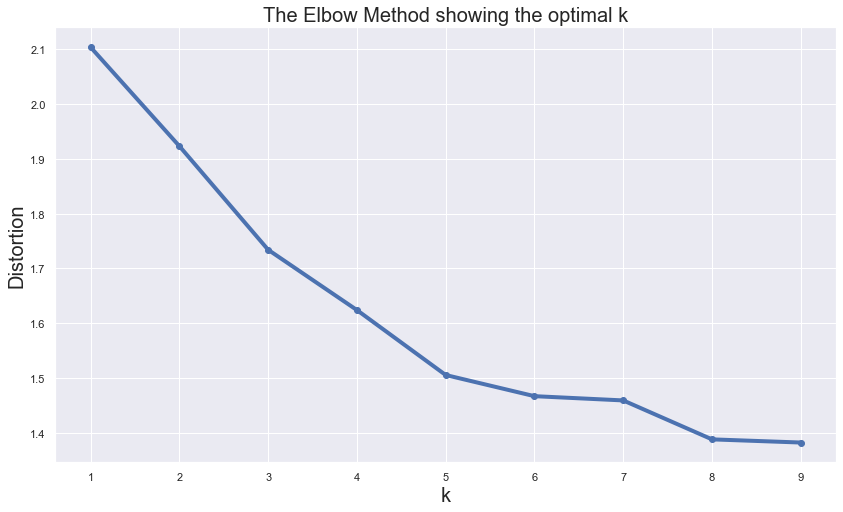

In [13]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_jobs=-1)
    kmeanModel.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

# Plot the elbow
plt.figure(figsize=(14,8))
plt.plot(K, distortions, linewidth=4, marker='o')
plt.xlabel('k',fontsize=20)
plt.ylabel('Distortion',fontsize=20)
plt.title('The Elbow Method showing the optimal k',fontsize=20)
plt.show()

## Using the optimal K for K-means

In [14]:
# KMeans with optimal number of clusters
kmeans = KMeans(4,random_state=9)
kmeans.fit(data_scaled)
predicted_df = sliced_data_df.copy()
predicted_df['cluster_pred'] = kmeans.predict(sliced_data_df) ## clusters remplace

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [15]:
predicted_df.sample(5)

,review_score,payment_value,time_elapsed_delivery,product_weight_g,geolocation_lng,geolocation_lat,product_description_lenght,cluster_pred
2019,-0.066450,-0.032401,-0.057966,-0.297289,0.570263,-0.060758,-0.720408,0
9188,0.681482,-0.272405,-0.255722,-0.524157,-0.799615,0.066902,-0.185727,0
3719,0.681482,-0.102378,-0.029716,-0.337325,-0.541099,-0.076252,-0.692753,0
2138,0.681482,-0.257215,-0.283973,-0.404051,-0.152397,-0.423896,2.762703,0
3290,0.681482,-0.154325,-0.142719,-0.297289,0.644191,-0.307701,3.395716,0


## TSNE (computational heavy)

In [16]:
from sklearn.manifold import TSNE

#instantiate tsne
tsne = TSNE(n_components=2,init='pca',n_jobs=-1,random_state=9,verbose=3,perplexity=5)
# fit tsne
data_embedded = tsne.fit_transform(sliced_data_df)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 0.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.096324
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 96.7894745, gradient norm = 0.0080740 (50 iterations in 1.427s)
[t-SNE] It

<Figure size 1008x576 with 0 Axes>

[None, None]

[None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Clustering Customers')

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 <a list of 7 Text xticklabel objects>)

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 <a list of 7 Text yticklabel objects>)

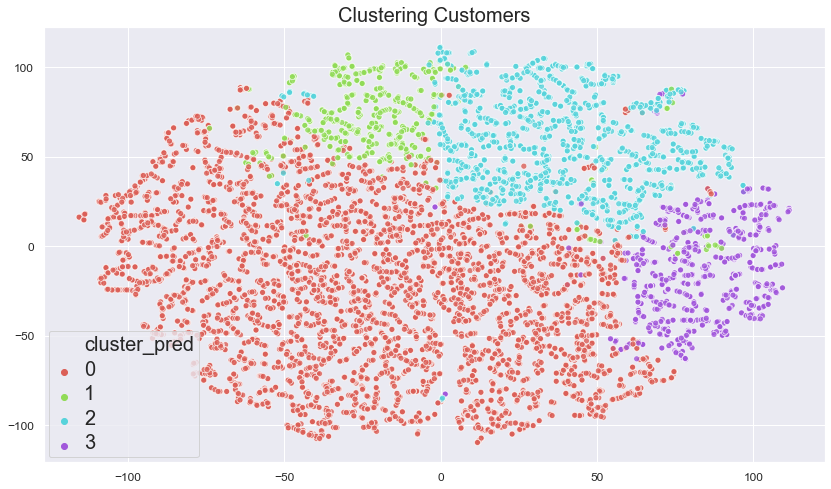

In [17]:
# Plot 2d t-SNE to see clusters
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x=data_embedded[:,0], y=data_embedded[:,1], alpha=0.8,\
                x_jitter=0.5, y_jitter=0.5, hue=predicted_df['cluster_pred'],\
                palette=sns.color_palette("hls", n_colors=4));


plt.setp(ax.get_legend().get_title(), fontsize='25')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.title('Clustering Customers'.title(), fontsize=20);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

## PCA ( lightweight)

In [18]:
from sklearn.decomposition import PCA


# instantiate and fit pca
pca = PCA(n_components=2,random_state=9)
pca1 = pca.fit_transform(sclaed_sliced_data)
print("explained variance 2d : ",pca.explained_variance_ratio_)

#3D pca
pca_3d = PCA(n_components=3,random_state=9)
pca_3 = pca_3d.fit_transform(sclaed_sliced_data)
print("explained variance 3d : ",pca_3d.explained_variance_ratio_)


explained variance 2d :  [0.22907587 0.18325796]
explained variance 3d :  [0.22907587 0.18325796 0.16998614]


### 3d PCA projection 

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0.92, 'clusters with PCA')

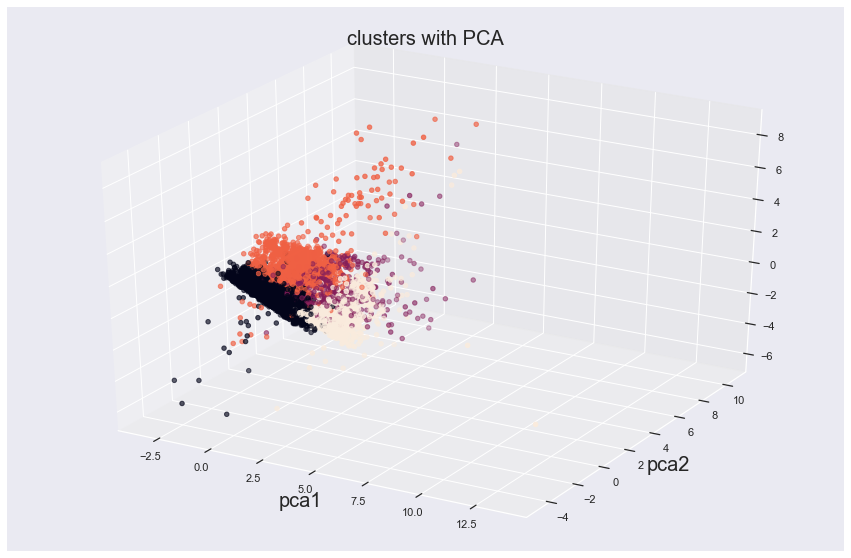

In [19]:
# PCA 3d projection
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_3[:,0], ys=pca_3[:,1],zs=pca_3[:,2], c=predicted_df['cluster_pred'])

ax.set_xlabel('pca1',fontsize=20)
ax.set_ylabel('pca2',fontsize=20)
ax.set_title('clusters with PCA',fontsize=20)

# DBSCAN Clustering

In [20]:
from sklearn.cluster import DBSCAN

# instantiate and fit dbscan
model = DBSCAN(eps=0.5, min_samples=40,n_jobs=-1).fit(sclaed_sliced_data)

Text(0.5, 0, 'pca1')

Text(0, 0.5, 'pca2')

Text(0.5, 1.0, 'clusters with DBSCAN')

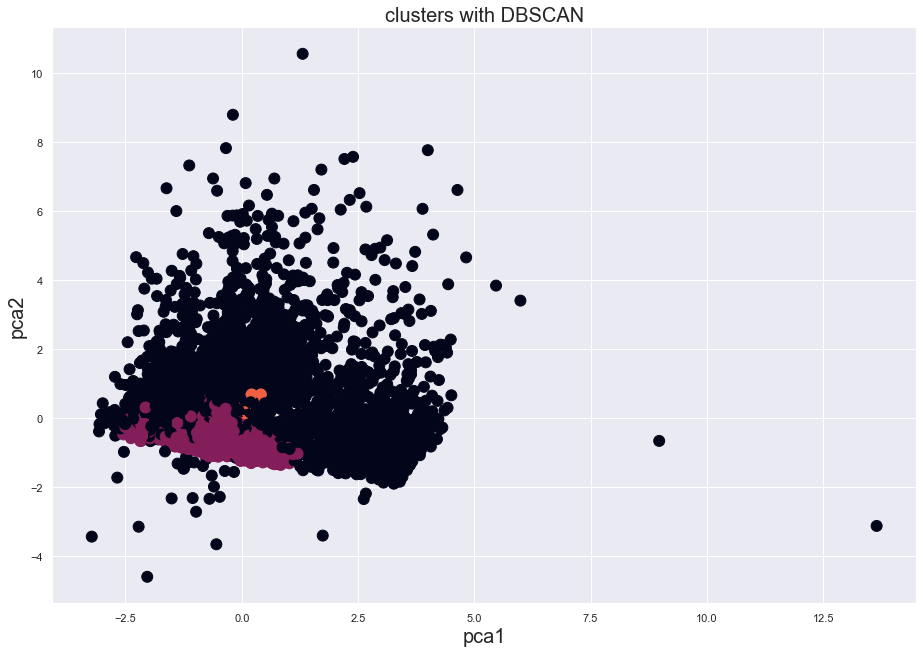

In [21]:
# plot 2d scatterplot you see the clusters using PCA
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_

ax.scatter(pca1[:,0], pca1[:,1], c=colors, s=120)

ax.set_xlabel('pca1',fontsize=20)
ax.set_ylabel('pca2',fontsize=20)
ax.set_title('clusters with DBSCAN',fontsize=20)

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0, 'pca3')

Text(0.5, 0.92, 'clusters with DBSCAN')

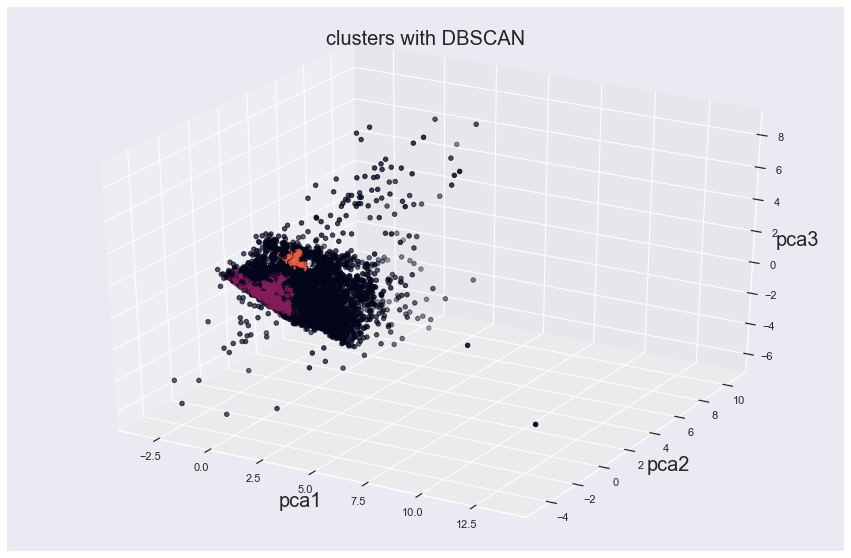

In [22]:
# # plot 2d scatterplot you see the clusters using PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_3[:,0], ys=pca_3[:,1],zs=pca_3[:,2], c=colors)
ax.set_xlabel('pca1',fontsize=20)
ax.set_ylabel('pca2',fontsize=20)
ax.set_zlabel('pca3',fontsize=20)
ax.set_title('clusters with DBSCAN',fontsize=20)

## DBSCAN étant plus complexe et des hyperparametres moins évidents a optimiser
## je préfere utiliser K-means car il est plus intuitif et facile a utiliser et surtout il est aussi extremement efficace l'un des meilleur algorithmes de clustering 